# Testing

In [1]:
# import pandas as pd
# import numpy as np
from binance.client import Client
from downloader import Downloader
import matplotlib.pyplot as plt
dl = Downloader()

In [3]:
client.get_all_isolated_margin_symbols()

TypeError: get_all_isolated_margin_symbols() missing 1 required positional argument: 'self'

In [2]:
import pandas as pd

In [3]:
import time

In [4]:
start = time.time()
data = dl.get_minutely_data("HNTUSDT", past=False)
time.time()-start

25.641687154769897

In [5]:
from datetime import datetime

In [6]:
data = data[-140000:]
data["timestamp"] = list(map(lambda x: datetime.fromtimestamp(x / 1e3), data.timestamp))

In [7]:
data.set_index("timestamp", inplace=True)

In [8]:
h = "1H"
df = pd.DataFrame(data["open"].resample(h).first(), columns=["open"])
df["high"] = data["high"].resample(h).max()
df["low"] = data["low"].resample(h).min()
df["close"] = data["close"].resample(h).last()
df["volume"] = data["volume"].resample(h).sum()

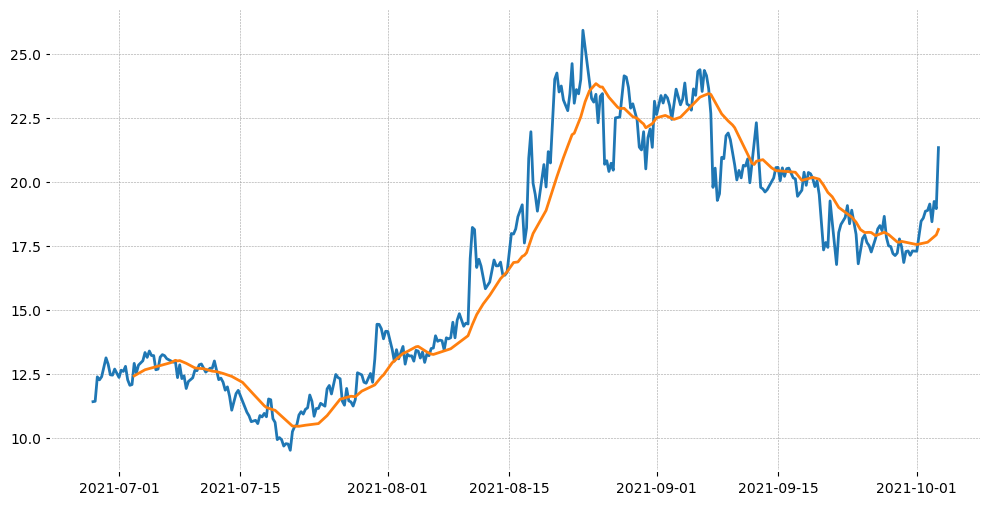

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.open)
ax.plot(df.open.rolling(window=20).mean())

In [9]:
import mplfinance as mpf

In [10]:
mc = mpf.make_marketcolors(base_mpf_style = 'charles', volume="inherit", inherit=True)
s = mpf.make_mpf_style(base_mpf_style = 'charles', marketcolors=mc)

## TODO: page 364 + seeing how to do fig ax with mplfinance. 

In [20]:
import numpy as np

In [37]:
ap = mpf.make_addplot(np.full(128, 29))

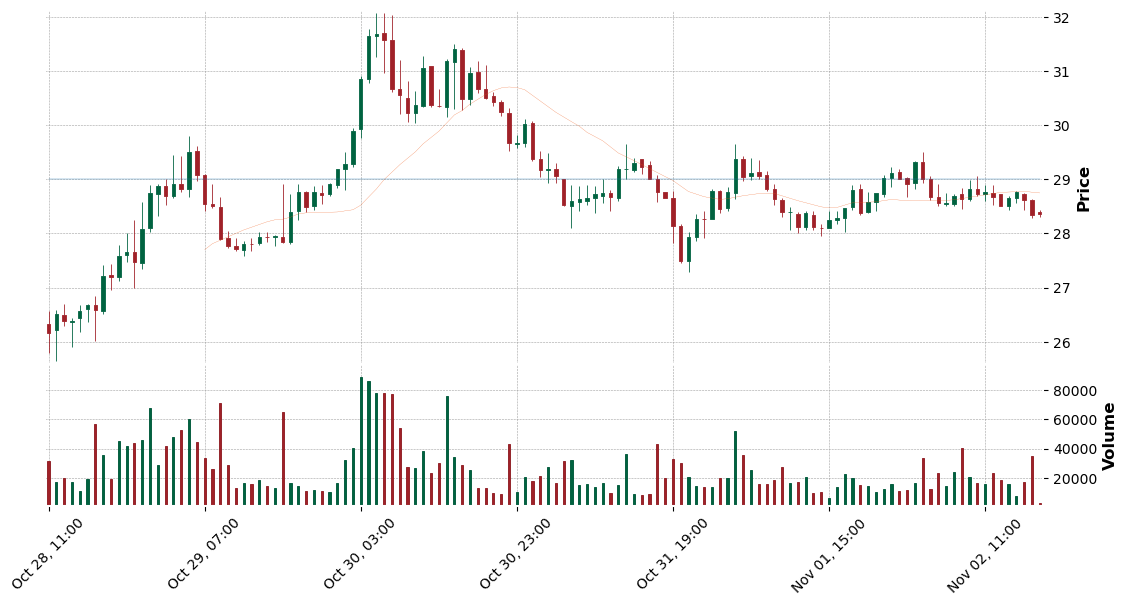

In [43]:
mpf.plot(df[-128:], figratio=(12, 6), type='candle',
         mav=(21), volume=True,
         tight_layout=True, style=s, 
         scale_width_adjustment=dict(volume=0.3,ohlc=1.3, lines=0.2, ohlc_linewidth=3),
         addplot=ap)

In [17]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

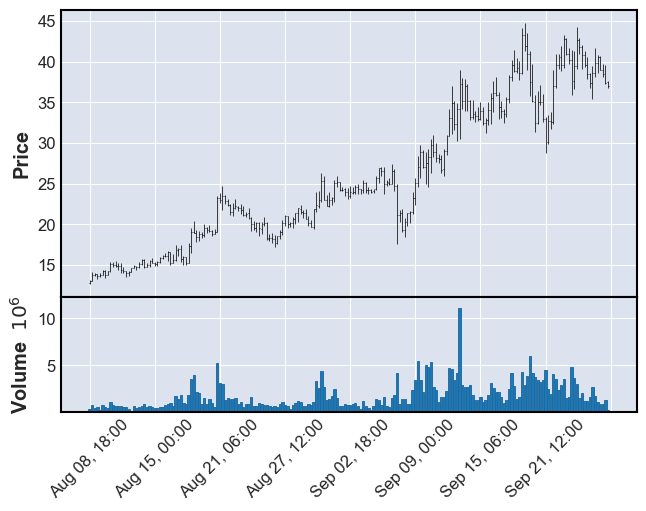

In [35]:
mpf.plot(df[-200:], volume=True)